Based on a post @ [Towards Data Science](https://towardsdatascience.com/logistic-regression-explained-593e9ddb7c6c).

# Logistic Regression - Explained

**Logistic regression** is a simple yet very effective classification algorithm so it is commonly used for many binary classification tasks.

- Customer churn, spam email, website or ad click predictions are some examples of the areas where logistic regression offers a powerful solution.

The basis of logistic regression is the logistic function, also called the sigmoid function, which takes in any real valued number and maps it to a value between 0 and 1.

$$
\text{Sigmoid function: } y = \displaystyle\frac{1}{1 + e^{-x}}
$$

Logistic regression model takes a linear equation as input and use logistic function and log odds to perform a binary classification task.

### Probability

Probability measures the likelihood of an event to occur.
- For example, if we say "there is a 90% chance that this email is spam": $\text P (\text{spam}) = 0.90$.

**Odds** is the ratio of the probabilities of positive class and negative class.

$$
\text{odds: } \displaystyle\frac{\text P (\text{spam})}{\text P (\neg\ \text{spam})}
$$

**Log odds** is the logarithm of odds.

<br><center><img src="./IMG/prob-odds-log.png" width=600></center><br>

All these concepts essentially represent the same measure but in different ways.
- In the case of logistic regression, log odds is used.
- We will see the reason why log odds is preferred in logistic regression algorithm.
    - Probability of $0.5$ means that there is an equal chance for the email to be spam or not spam.
    - Please note that <u>the log odds of probability $0.5$ is $0$</u>. We will use that.

Let's go back to the sigmoid function and show it in a different way:

$$
y = \displaystyle\frac{1}{1 + e^{-x}} \Rightarrow 1 + e^{-x} = \displaystyle\frac{1}{y} \Rightarrow e^{-x} = \frac{1-y}{y} \Rightarrow e^x = \frac{y}{1-y}
$$

Taking the natural log of both sides:

$$
\Rightarrow x = \log \Bigg( \displaystyle\frac{1-y}{y} \Bigg)
$$

In the previous equation, instead of $x$, we can use a linear equation $z$:

$$
z = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n\ ,
$$

Then the equation becomes:

$$
\beta_0 + \beta_1 x_1 + ... + \beta_n x_n = \log \Bigg( \displaystyle\frac{1-y}{y} \Bigg)
$$

Assume $y$ is the probability of positive class.
- If $z$ is $0$, then $y$ is $0.5$.
- For positive values of $z$, $y$ is higher than $0.5$ and for negative values of $z$, $y$ is less than $0.5$.
    - If the probability of positive class is more than $0.5$ (i.e. more than $50\%$ chance), we can predict the outcome as a positive class ($1$).
    - Otherwise, the outcome is a negative class ($0$).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use('seaborn')

In [32]:
zmin, zmax = -5.0, 5.0
zs = np.linspace(zmin, zmax, num=100)
logit = lambda z: np.reciprocal(1 + np.exp(-z))

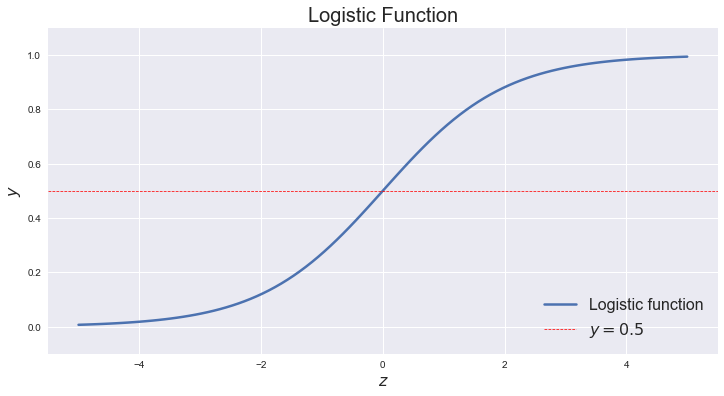

In [33]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Logistic Function', fontsize=20)

ax.plot(zs, logit(zs), linewidth=2.5, label='Logistic function')
ax.axhline(y=0.5, linestyle='dashed', linewidth=0.75, color='red', label=r'$y = 0.5$')

ax.set_xlabel(r'$z$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
ax.set_ylim([-0.1, 1.1])

ax.legend(loc='lower right', prop={'size': 16})
plt.show()

The classification problem comes down to solving a linear equation:

$$
0 = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n
$$

Parameters of the function are determined in training phase with maximum-likelihood estimation algorithm.
- Then, for any given values of independent variables $(x_1, … x_n)$, the probability of positive class can be calculated.

We can use the calculated probability 'as is'.
- For example, the output can be a probability that the email is spam is $95\%$ or the probability that customer will click on this ad is $70\%$.
- However, in most cases, probabilities are used to classify data points. If the probability is greater than 50%, the prediction is positive class ($1$). Otherwise, the prediction is negative class ($0$).

It is not always desired to choose positive class for all probability values higher than $50\%$.
- The value that serves as a threshold between positive and negative class is problem-dependent.
- Good thing is that logistic regression allows us to adjust this threshold value.

<u>If we set a high threshold (i.e. $95\%$), almost all the predictions we made as positive will be correct. However, we will miss some of the positive class and label them as negative</u>.

<u>If we set a low threshold (i.e. $30\%$), we will predict almost all the positive classes correctly. However, we will classify some of the negative classes as positive</u>.

Both of these cases will affect the accuracy of our model.
- The simplest way to measure accuracy is: $\text{Accuracy} = \displaystyle\frac{\text{Num. of Correct Predictions}}{\text{Num. of Predictions}}$.

However, this is usually not enough to evaluate classification models.
- In some binary classification tasks, there is an imbalance between positive and negative classes.
    -  Think about classifying tumors as malignant and benign. Most of the target values (tumors) in the dataset will be $0$ (benign) because malignant tumors are very rare compared to benign ones.
        - A typical set would include more than $90\%$ benign ($0$) class.
        - So, if the model predicts all the examples as $0$ without making any calculation, the accuracy is more than $90\%$.
        - It sounds good but is useless in this case.
    - Therefore, we need other measures to evaluate classification models.
    - These measures are **precision** and **recall**.

### Precision and Recall

First, we need to define some terms:

- **True positive** (TP): Correctly predict positive ($1$) class;
- **False positive** (FP): Predict negative ($0$) class as positive;
- **True negative** (TN): Correctly predict negative ($0$) class;
- **False negative** (FN): Predict positive class ($0$) as negative.

It is desired to make a prediction that is either TP or TN so the models aim to maximize TP and TN values.

**Precision** measures how good our model is when the prediction is positive.

$$
\text{Precision} = \displaystyle\frac{\text{TP}}{\text{TP} + \text{FP}}
$$

**Recall** measures how good our model is at correctly predicting positive classes.

$$
\text{Recall} = \displaystyle\frac{\text{TP}}{\text{TP} + \text{FN}}
$$

We cannot try to maximize both precision and recall because there is a trade-off between them.
- Increasing precision decreases recall and vice versa.
- You can aim to maximize precision or recall depending on the task.
    - For an email spam detection model, we try to maximize precision because we want to be correct when an email is detected as spam.
    - We do not want to label a normal email as spam (i.e. false positive). If false positive is low, then precision is high.

There is another measure that combines precision and recall into a single numbet: F1 score.
- It is the weighted average ([harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean)) of precision and recall: $\text{F1 score} = 2 \cdot \displaystyle\frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$.
- F1 score is a more useful measure than accuracy for problems with uneven class distribution because it takes into account both false positive and false negatives.

### Scikit-learn Implementation


In [35]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [36]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred, target_names=['neg class', 'pos class']))

              precision    recall  f1-score   support

   neg class       0.91      0.98      0.95        53
   pos class       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

